<h1 style='color:red' align='center'>Employee Churn Prediction</h1>

<h1 style='color:blue' align='left'>Look at the Big Picture</h1>

What we want to achieve with this project is to use machine learning to predict the rate at which employees are leaving a particular company.

<h2 style='color:black' align='left'>Frame the Problem</h2>

Employee turnover has become a major issue. So this project will be used to better understand why employees are leaving the company. The task is a supervised learning task of binary classification.

<h2 style='color:black' align='left'>Performance Measure</h2>

We will be evaluating the performance of our classifier using Accuracy, Cross Validation and Precision/Recall.

<h2 style='color:black' align='left'>Assumptions</h2>

No assumption was made as to how the end result will be utilized.

<h1 style='color:blue' align='left'>Get the Data</h1>

<h2 style='color:black' align='left'>Load Data</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
FILE_PATH = os.getcwd()
FILE = 'HR_comma_sep.csv'
def load_data(file_path, file):
    dir_file = os.path.join(file_path,file)
    churn = pd.read_csv(dir_file)
    return churn
churn = load_data(FILE_PATH, FILE)

<h2 style='color:black' align='left'>Take a Quick Look at the Data Structure</h2>

In [3]:
churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# A look at data description
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#convert target variable to string
churn['left'] = churn['left'].astype(str)

In [6]:
churn['left']

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: object

In [7]:
# Unique categories in the 'Department' column
churn['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [8]:
# Also look at unique categories in 'salary' column
churn['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
# Lets see summary of numerical attributes
churn.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


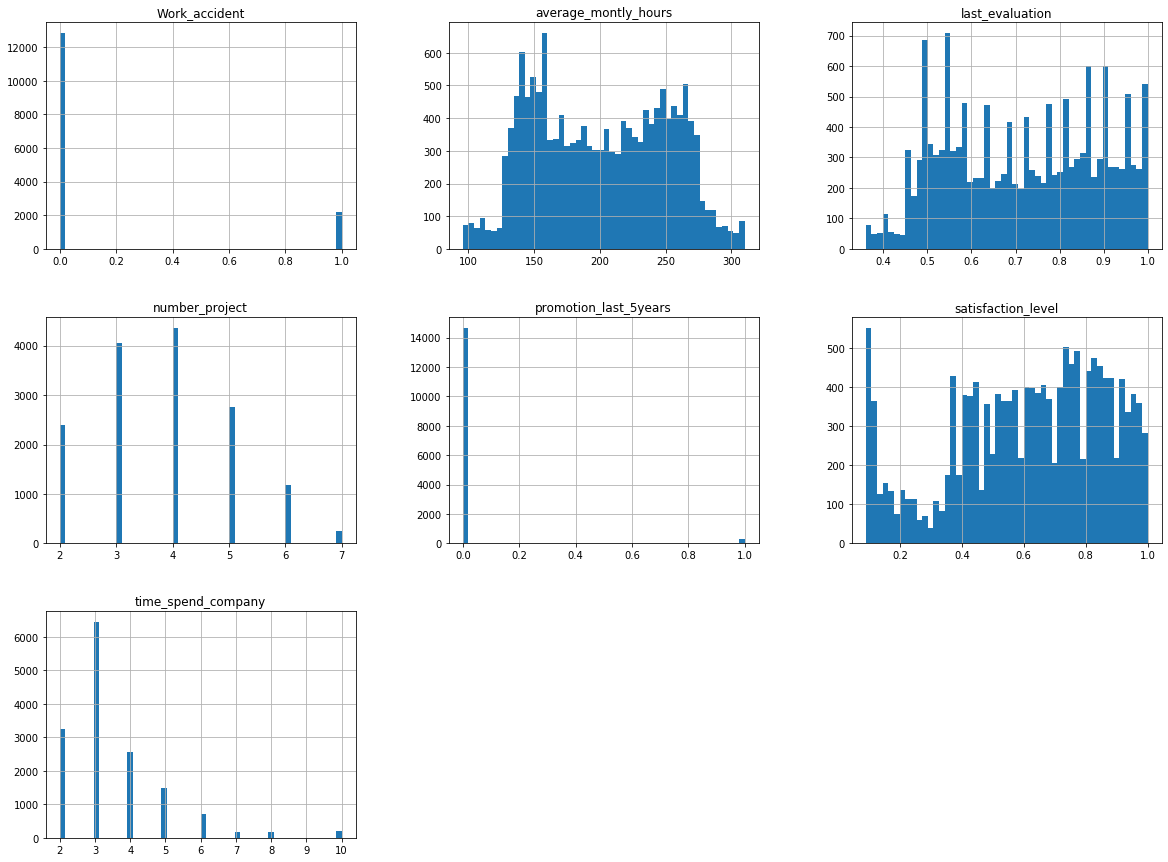

In [10]:
# Lets see type of data and distribution
churn.hist(bins=50,figsize=(20,15))
plt.show()

<h2 style='color:black' align='left'>Create a Test Set</h2>

In [11]:
# Split the data to train and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

<h1 style='color:blue' align='left'>Discover and Visualize the Data to Gain Insights</h1>

<h2 style='color:black' align='left' >Visualizing and Examining Data</h2>

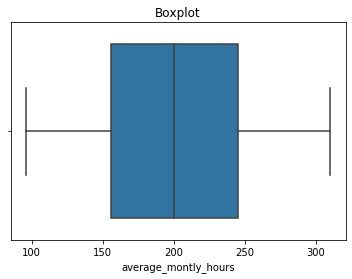

In [12]:
import seaborn as sns
sns.boxplot(train_set['average_montly_hours']).set_title('Boxplot')
plt.show()

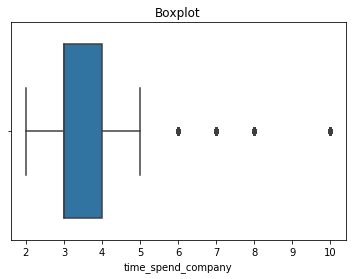

In [13]:
sns.boxplot(train_set['time_spend_company']).set_title('Boxplot')
plt.show()

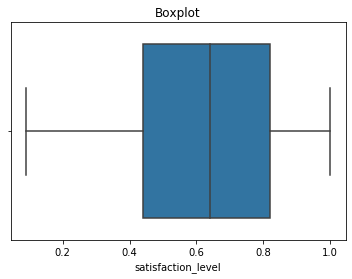

In [14]:
sns.boxplot(train_set['satisfaction_level']).set_title('Boxplot')
plt.show()

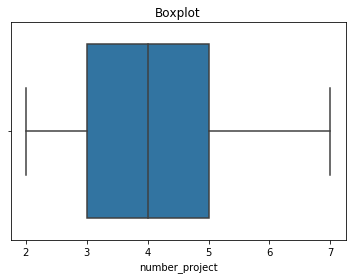

In [15]:
sns.boxplot(train_set['number_project']).set_title('Boxplot')
plt.show()

**Boxplot shows that the 'time_spend_company' column has outliers.**

<h2 style='color:black' align='left'>Looking for Correlations</h2>

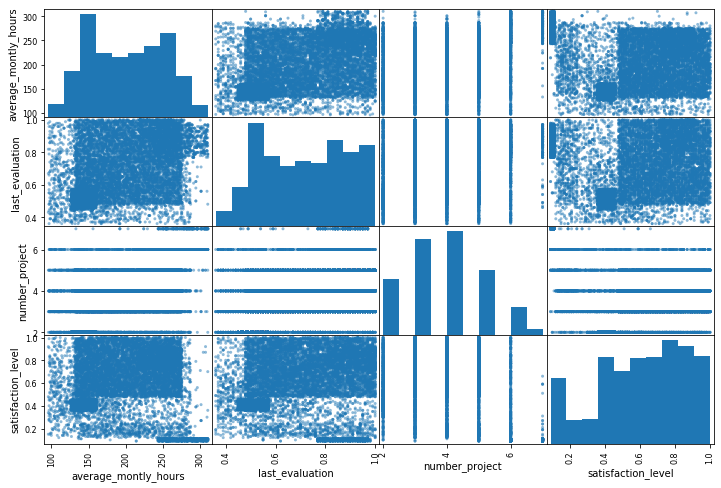

In [16]:
from pandas.plotting import scatter_matrix

#Look for correlations between the features
columns = ['average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']
scatter_matrix(train_set[columns], figsize=(12, 8))
plt.show()

<h1 style='color:blue' align='left'>Prepare the Data for Machine Learning Algorithms</h1>

<h2 style='color:black' align='left'>Data Cleaning</h2>

In [17]:
# Identify columns with single value and remove them
train_set.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [18]:
# Identify and remove rows with duplicate data
train_set = train_set.drop_duplicates(keep='first')

In [19]:
# Remove outliers
Q1, Q3= train_set['time_spend_company'].quantile(0.25), train_set['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off

In [20]:
outliers = train_set[(train_set['time_spend_company'] < lower)|(train_set['time_spend_company'] > upper)]
outliers.shape

(705, 10)

In [21]:
train_set = train_set[(train_set['time_spend_company'] > lower) & (train_set['time_spend_company'] < upper)]

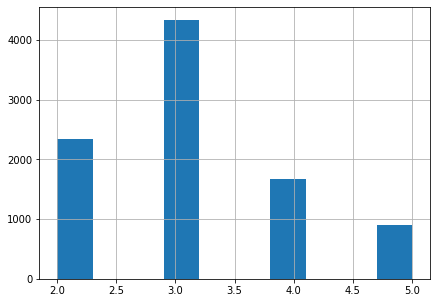

In [22]:
# Lets take a look at the 'time_spend_company', after outliers removal
train_set['time_spend_company'].hist(figsize=(7,5))
plt.show()

**The distribution has become less skewed after the outliers removal.**

<h2 style='color:black' align='left'>Feature Selection</h2>

<h3 style='color:black' align='left'>Convert all inputs to numeric</h3>

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif

#separate target variable
def separate_target(train_set,test_set):
    X_train = train_set.drop('left',axis=1)
    y_train = train_set['left'].copy()
    X_test = test_set.drop('left',axis=1)
    y_test = test_set['left'].copy()
    return X_train, y_train, X_test, y_test

#prepare inputs
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder([['low','medium','high']])
    oe.fit(X_train[['salary']])
    X_train_enc = oe.transform(X_train[['salary']])
    X_test_enc = oe.transform(X_test[['salary']])
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

#encode norminal variable
def encode_oneHot(X_train, X_test):
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(X_train[['Department']])
    X_train_ohe_enc = ohe.transform(X_train[['Department']])
    X_test_ohe_enc = ohe.transform(X_test[['Department']])
    return X_train_ohe_enc, X_test_ohe_enc

X_train, y_train, X_test, y_test = separate_target(train_set, test_set)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_ohe_enc, X_test_ohe_enc = encode_oneHot(X_train, X_test)

In [24]:
# get the numeric columns and concatenate the transformed array columns
def data(X_train,X_test):
    X_train_num = X_train.iloc[:,:-2].values
    X_test_num = X_test.iloc[:,:-2].values
    return X_train_num, X_test_num
X_train_num, X_test_num = data(X_train,X_test)

In [25]:
#Concatenate arrays back into the full training set
X_train_var = np.c_[X_train_num, X_train_enc, X_train_ohe_enc ]

**Note: Better to convert target in a classification problem earlier in the data prep to string. Rearrange the data early to have the numeric variables come first , followed by the ordinal categorical and then the norminal to be last.
Feature selection is easier if the features are all categorical or all numerical, so converting categorical to numerical before feature selection is very important.
All of the transformation during Feature selection will not be effected on the training data, better to use Pipelines and Columns transformation.**

In [26]:
# select the best features
def select_features(X_train_var, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train_var, y_train)
    X_train_fs = fs.transform(X_train_var)
    return X_train_fs, fs
X_train_fs, fs = select_features(X_train_var, y_train)

In [27]:
fs.scores_

array([1.87053946e+03, 1.03060346e+00, 6.61278949e+00, 3.51143172e+01,
       1.15901283e+03, 1.56775709e+02, 1.57371747e+01, 1.32829837e+02,
       2.12087173e-02, 1.02693979e+01, 2.10765459e-01, 8.18318010e-01,
       2.21312589e+00, 1.54225914e-01, 3.21225450e-01, 1.67906846e+00,
       2.70719586e-01, 1.08257098e+00])

In [28]:
#View scores for each feature
for i in range(len(fs.scores_)):
    print('Feature: %d: %f' % (i, fs.scores_[i]))

Feature: 0: 1870.539458
Feature: 1: 1.030603
Feature: 2: 6.612789
Feature: 3: 35.114317
Feature: 4: 1159.012830
Feature: 5: 156.775709
Feature: 6: 15.737175
Feature: 7: 132.829837
Feature: 8: 0.021209
Feature: 9: 10.269398
Feature: 10: 0.210765
Feature: 11: 0.818318
Feature: 12: 2.213126
Feature: 13: 0.154226
Feature: 14: 0.321225
Feature: 15: 1.679068
Feature: 16: 0.270720
Feature: 17: 1.082571


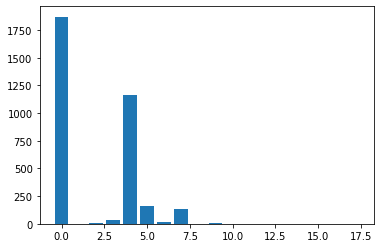

In [29]:
#Plot feature selection score
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

**From the scores and bar graphs we can see that the most relevant features are: satisfaction_level, time_spend_company, Work_accident, and salary.**

**Drop the 'promotion_last_5years' feature. The data is almost like having one value.**

In [30]:
# Drop irrelevant feature
X_train = X_train.drop('promotion_last_5years',axis=1)
X_test = X_test.drop('promotion_last_5years',axis=1)

In [31]:
# Rearrange feature
col = X_train.pop('salary')
X_train.insert(6, 'salary', col)

col = X_test.pop('salary')
X_test.insert(6, 'salary', col)

<h2 style='color:black' align='left'>Transformation Pipelines</h2>

The transformations done earlier was to enable feature selection. We will now use ColumnTransformer for transforming different data types on the column.

In [32]:
# Create final transformation for train set
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train)[:6]
oe_attribs = ['salary']
ohe_attribs = ['Department']
full_transform = ColumnTransformer(transformers=[
     ('std_scaler', StandardScaler(), num_attribs),
    ('ordinal_enc', OrdinalEncoder(categories=[['low','medium','high']]), oe_attribs),
    ('oneHot_enc', OneHotEncoder(sparse=False), ohe_attribs)],
                                  remainder='passthrough')
X_train_final = full_transform.fit_transform(X_train) 

In [33]:
# Create final transformation for test set 
X_test_final = full_transform.transform(X_test) 

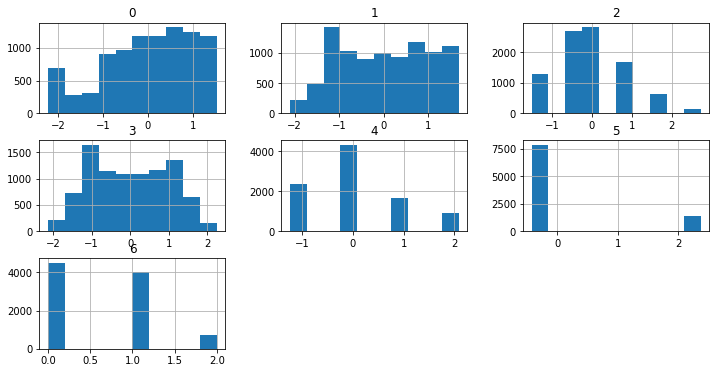

In [34]:
# Plot histogram to check result of feature scaling
pd.DataFrame(X_train_final).iloc[:,:7].hist(figsize=(12,6))
plt.show()

<h1 style='color:blue' align='left'>Select, Train and Evaluate Models</h1>

<h2 style='color:black align='left>Training and Evaluating on the Training Set</h2>

<h3 style='color:black' align='left'>Logistic Regression</h3>

In [35]:
#Train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train_final, y_train_enc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = lr.predict(X_train_final)

<h4 style='color:black' align='left'>Model Evaluation</h4>

In [37]:
#Evaluate model on training set
accuracy = accuracy_score(y_train_enc, y_pred)

In [38]:
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 82.16


In [39]:
# Evaluate cross validation
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

n_scores = cross_val_score(lr, X_train_final, y_train_enc, scoring='accuracy',cv=3, n_jobs=-1)
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores * 100), std(n_scores * 100)))

[0.82615733 0.81935902 0.81665047]
Accuracy: 82.072 (0.400)


In [40]:
#Evaluate Precision/Recall
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_enc, y_pred)

0.5116279069767442

In [41]:
recall_score(y_train_enc, y_pred)

0.301909307875895

In [42]:
# Get the f1_score
from sklearn.metrics import f1_score

f1_score(y_train_enc, y_pred)

0.3797373358348968

<h3 style='color:black' align='left'>Decision Tree Classifier</h3>

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_final, y_train_enc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_pred_tree = tree.predict(X_train_final)

<h4 style='color:black' align='left'>Model Evaluation</h4>

In [45]:
#Evaluate model on training set
accuracy = accuracy_score(y_train_enc, y_pred_tree)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 100.00


In [46]:
# Evaluate cross validation
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

n_scores = cross_val_score(lr, X_train_final, y_train_enc, scoring='accuracy',cv=3, n_jobs=-1)
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores * 100), std(n_scores * 100)))

[0.82615733 0.81935902 0.81665047]
Accuracy: 82.072 (0.400)


In [47]:
#Evaluate Precision/Recall
precision_score(y_train_enc, y_pred_tree)

1.0

In [48]:
recall_score(y_train_enc, y_pred_tree)

1.0

In [49]:
# Get the f1_score
from sklearn.metrics import f1_score

f1_score(y_train_enc, y_pred_tree)

1.0

<h3 style='color:black' align='left'>Random Forest Classifier</h3>

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_final, y_train_enc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred_rf = rf.predict(X_train_final)

<h4 style='color:black' align='left'>Model Evaluation</h4>

In [52]:
#Evaluate model on training set
accuracy = accuracy_score(y_train_enc, y_pred_rf)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 99.98


In [53]:
# Evaluate cross validation
n_scores = cross_val_score(rf, X_train_final, y_train_enc, scoring='accuracy',cv=3, n_jobs=-1)
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores * 100), std(n_scores * 100)))

[0.98187116 0.98057624 0.9850988 ]
Accuracy: 98.252 (0.190)


In [54]:
#Evaluate Precision/Recall
precision_score(y_train_enc, y_pred_rf)

1.0

In [55]:
recall_score(y_train_enc, y_pred_rf)

0.9988066825775657

In [56]:
# Get the f1_score
from sklearn.metrics import f1_score

f1_score(y_train_enc, y_pred_rf)

0.9994029850746269

<h2 style='color:black' align='left'>Learning Curves</h2>

In [57]:
#Plot learning curve for RandomForest Classifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train_final, y_train_enc,cv=10, 
                                                        scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.01,1,50),
                                                        verbose=1)

[learning_curve] Training set sizes: [  83  251  420  588  757  925 1094 1262 1431 1599 1767 1936 2104 2273
 2441 2610 2778 2947 3115 3284 3452 3621 3789 3957 4126 4294 4463 4631
 4800 4968 5137 5305 5474 5642 5811 5979 6147 6316 6484 6653 6821 6990
 7158 7327 7495 7664 7832 8001 8169 8338]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   24.2s finished


In [58]:
#Get the train scores mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [59]:
#Get the test scores mean and standard deviation
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

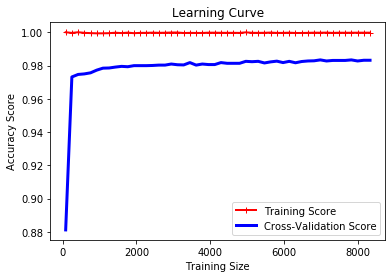

In [60]:
plt.plot(train_sizes, train_mean, "r-+", linewidth=2,label = 'Training Score')
plt.plot(train_sizes, test_mean, "b-", linewidth=3,label = 'Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

<h1 style='color:blue' align='left'>Fine-Tune Your Model</h1>

<h2 style='color:black' align='left'>Grid Search</h2>

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 30, 50], 'max_features': [2, 4, 7, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 25, 50], 'max_features': [3, 5, 7, 8]}
]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=False,
                          )
grid_search.fit(X_train_final, y_train_enc)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [62]:
# Lets get the best parameter directly
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

In [63]:
# Best estimator
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
#Results
grid_search.cv_results_

{'mean_fit_time': array([0.03125577, 0.09528608, 0.1570745 , 0.0464026 , 0.12433238,
        0.20628419, 0.06250815, 0.16909184, 0.28815198, 0.06562929,
        0.19063787, 0.3125298 , 0.05534244, 0.1312582 , 0.25627055,
        0.06875544, 0.17348232, 0.34064879, 0.09063225, 0.22038546,
        0.44576006, 0.10000806, 0.2468998 , 0.49066172]),
 'std_fit_time': array([7.26515829e-06, 1.91726106e-03, 8.54266920e-03, 6.94015627e-03,
        8.09373394e-03, 6.52666149e-03, 6.89256525e-06, 1.01691347e-02,
        1.25485323e-02, 6.25333827e-03, 6.24595144e-03, 9.88664525e-03,
        6.25419914e-03, 7.65731059e-03, 7.65364346e-03, 7.65567145e-03,
        2.07050456e-03, 6.24891528e-03, 6.25017154e-03, 1.04061899e-02,
        8.40055230e-03, 7.65547306e-03, 6.24642605e-03, 1.24960135e-02]),
 'mean_score_time': array([0.00312204, 0.01117764, 0.0146009 , 0.00060058, 0.00652857,
        0.01562924, 0.        , 0.00574274, 0.01829495, 0.00312533,
        0.00312529, 0.01562395, 0.00060053, 0.00

In [65]:
#Best score
grid_search.best_score_

0.9845655693470049

In [66]:
# Evaluation score
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

0.9786292498650836 {'max_features': 2, 'n_estimators': 10}
0.9803561791689153 {'max_features': 2, 'n_estimators': 30}
0.9801403130059363 {'max_features': 2, 'n_estimators': 50}
0.9819751753912574 {'max_features': 4, 'n_estimators': 10}
0.9831624392876417 {'max_features': 4, 'n_estimators': 30}
0.9833783054506207 {'max_features': 4, 'n_estimators': 50}
0.9834862385321101 {'max_features': 7, 'n_estimators': 10}
0.9844576362655154 {'max_features': 7, 'n_estimators': 30}
0.9843497031840259 {'max_features': 7, 'n_estimators': 50}
0.983702104695089 {'max_features': 8, 'n_estimators': 10}
0.9844576362655154 {'max_features': 8, 'n_estimators': 30}
0.9845655693470049 {'max_features': 8, 'n_estimators': 50}
0.9799244468429573 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.9827307069616837 {'bootstrap': False, 'max_features': 3, 'n_estimators': 25}
0.981867242309768 {'bootstrap': False, 'max_features': 3, 'n_estimators': 50}
0.9832703723691312 {'bootstrap': False, 'max_features': 5

In [67]:
# Results in a DataFrame
cv_res = grid_search.cv_results_
df = pd.DataFrame(cv_res)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031256,0.000007,0.003122,0.006244,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.978425,0.977334,0.975175,0.986508,0.975702,0.978629,0.004106,24
1,0.095286,0.001917,0.011178,0.006149,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.979504,0.975175,0.978953,0.987048,0.981102,0.980356,0.003870,21
2,0.157074,0.008543,0.014601,0.001777,2,50,NaN,"{'max_features': 2, 'n_estimators': 50}",0.981122,0.974636,0.977334,0.986508,0.981102,0.980140,0.004015,22
3,0.046403,0.006940,0.000601,0.001201,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.982201,0.979493,0.979493,0.985969,0.982721,0.981975,0.002403,19
4,0.124332,0.008094,0.006529,0.005939,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.981661,0.978953,0.981651,0.987048,0.986501,0.983162,0.003114,16
5,0.206284,0.006527,0.015629,0.000005,4,50,NaN,"{'max_features': 4, 'n_estimators': 50}",0.982201,0.979493,0.981651,0.988667,0.984881,0.983378,0.003153,13
6,0.062508,0.000007,0.000000,0.000000,7,10,NaN,"{'max_features': 7, 'n_estimators': 10}",0.983279,0.978953,0.980572,0.987588,0.987041,0.983486,0.003422,12
7,0.169092,0.010169,0.005743,0.005819,7,30,NaN,"{'max_features': 7, 'n_estimators': 30}",0.984898,0.980032,0.981112,0.988127,0.988121,0.984458,0.003402,3
8,0.288152,0.012549,0.018295,0.005323,7,50,NaN,"{'max_features': 7, 'n_estimators': 50}",0.984898,0.979493,0.982731,0.988127,0.986501,0.984350,0.003014,7
9,0.065629,0.006253,0.003125,0.006251,8,10,NaN,"{'max_features': 8, 'n_estimators': 10}",0.981661,0.979493,0.982191,0.987588,0.987581,0.983702,0.003296,11


In [68]:
# Lets look at parameters and mean_test_score
df[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_features': 2, 'n_estimators': 10}",0.978629
1,"{'max_features': 2, 'n_estimators': 30}",0.980356
2,"{'max_features': 2, 'n_estimators': 50}",0.980140
3,"{'max_features': 4, 'n_estimators': 10}",0.981975
4,"{'max_features': 4, 'n_estimators': 30}",0.983162
5,"{'max_features': 4, 'n_estimators': 50}",0.983378
6,"{'max_features': 7, 'n_estimators': 10}",0.983486
7,"{'max_features': 7, 'n_estimators': 30}",0.984458
8,"{'max_features': 7, 'n_estimators': 50}",0.984350
9,"{'max_features': 8, 'n_estimators': 10}",0.983702


<h2 style='color:black' align='left'>Analyze the Best Models and Their Errors</h2>

**We are only dealing with random forest classifier.**

<h2 style='color:black' align='left'>Evaluate Your System on the Test Set</h2>

In [77]:
# Make sure the test set has the necessary transforms
pd.DataFrame(X_test_final).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.089899,1.448704,1.029788,0.528392,-1.247888,2.366221,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.044309,0.499238,-0.669711,-0.701919,-1.247888,-0.422615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.255883,1.567388,-0.669711,0.282330,-1.247888,-0.422615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.906008,-1.459036,-1.519460,-0.947981,-0.135760,-0.422615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.002813,0.261872,1.029788,1.102537,-1.247888,2.366221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
y_test_enc

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_final)
final_accuracy = accuracy_score(y_test_enc, final_predictions)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 99.98
